In [1]:
import pandas as pd
import matplotlib.pyplot as plt


### Data cleaning

In [2]:
# Monthly stock trading

# Read file
monthly_stock_trading = pd.read_csv(r"C:\Users\DELL\Desktop\FIN3080\HW\HW1\Python_version\raw_data\monthly_stock_trading.csv")

# Rename columns
monthly_stock_trading.columns = ["stock_code", "date", "closing_price", "monthly_return", "market_type"]

# Convert "date" column to period type
monthly_stock_trading['date'] = pd.to_datetime(monthly_stock_trading['date']).dt.to_period('M')

In [3]:
# Quarterly index per share

# Read file
quarterly_index_per_share = pd.read_csv(r"C:\Users\DELL\Desktop\FIN3080\HW\HW1\Python_version\raw_data\quarterly_index_per_share.csv")

# Drop unnecessary columns.
quarterly_index_per_share = quarterly_index_per_share.drop(columns = ["ShortName_EN"])

# Rename columns
quarterly_index_per_share.columns = ["stock_code", "date", "statement_type", 'EPS', "NAPS"]

# Delete all the rows including "B" in their statement_type columns.
quarterly_index_per_share = quarterly_index_per_share[quarterly_index_per_share["statement_type"] != "B"]

# Drop statement_type column
quarterly_index_per_share = quarterly_index_per_share.drop(columns = ["statement_type"])

# Convert "date" column to period type
# Converts the "date" column to datetime format using pd.to_datetime(...)
# Then it converts the datetime into a monthly period using .dt.to_period("M"),  
# which means each date is now represented as the year and month, losing the day precision.
quarterly_index_per_share["date"] = pd.to_datetime(quarterly_index_per_share["date"]).dt.to_period("M")

# .dt.to_timestamp(): converts the monthly periods back into timestamps.Type changes from Period[M] → Timestamp (datetime64[ns])
# + pd.DateOffset(months = 1): shifts each date forward by 1 month. E.g., 2023-01-01 becomes 2023-02-01.
# .dt.to_period('M'): then converts the shifted datetime back to monthly periods.
quarterly_index_per_share["date"] = (quarterly_index_per_share["date"].dt.to_timestamp() + pd.DateOffset(months = 1)).dt.to_period("M")
# So now we can use the newest accounting report in our analysis.

In [4]:
# Quarterly income statement

# Read file
quarterly_income_statement = pd.read_csv(r"C:\Users\DELL\Desktop\FIN3080\HW\HW1\Python_version\raw_data\quarterly_income_statement.csv")

# Drop unnecessary columns.
quarterly_income_statement = quarterly_income_statement.drop(columns = ["ShortName_EN"])

# Rename columns.
quarterly_income_statement.columns = ["stock_code", "date", "statement_type", "RD_expense"]

# Delete all the rows including "B" in the statement_type column.
quarterly_income_statement = quarterly_income_statement[quarterly_income_statement["statement_type"] != "B"]

# Drop statement_type column
quarterly_income_statement = quarterly_income_statement.drop(columns = ["statement_type"])

# Convert "date" column to period type
quarterly_income_statement["date"] = pd.to_datetime(quarterly_income_statement["date"]).dt.to_period("Q")


In [5]:
# Quarterly balance sheet

# Read file
quarterly_balance_sheet = pd.read_csv(r"C:\Users\DELL\Desktop\FIN3080\HW\HW1\Python_version\raw_data\quarterly_balance_sheet.csv")

# Drop unnecessary columns.
quarterly_balance_sheet = quarterly_balance_sheet.drop(columns = ["ShortName_EN"])

# Rename columns
quarterly_balance_sheet.columns = ["stock_code", "date", "statement_type", "total_asset", "total_liability"]

# Delete all the rows including "B" in the statement_type column.
quarterly_balance_sheet = quarterly_balance_sheet[quarterly_balance_sheet["statement_type"] != "B"]

# quarterly_balance_sheet = quarterly_balance_sheet.drop(quarterly_balance_sheet[quarterly_balance_sheet["statement_type"] == "B"].index)
# index: Extracts the index values of those rows.

# Drop statement_type column
quarterly_balance_sheet = quarterly_balance_sheet.drop(columns = ["statement_type"])

# Convert "date" column to period type
quarterly_balance_sheet["date"] = pd.to_datetime(quarterly_balance_sheet["date"]).dt.to_period("Q")

In [6]:
# Quarterly earining capacity

# Read file 
quarterly_earning_capacity = pd.read_csv(r"C:\Users\DELL\Desktop\FIN3080\HW\HW1\Python_version\raw_data\quarterly_earning_capacity.csv")

# Drop unnecessary columns.
quarterly_earning_capacity = quarterly_earning_capacity.drop(columns = ["ShortName_EN"])

# Rename columns
quarterly_earning_capacity.columns = ["stock_code", "date", "statement_type", "ROA", "ROE"]

# Delete all the rows including "B" in the statement_type column
quarterly_earning_capacity = quarterly_earning_capacity[quarterly_earning_capacity["statement_type"] != "B"]

# Drop statement_type column
quarterly_earning_capacity = quarterly_earning_capacity.drop(columns = ["statement_type"])

#  Convert "date" column to period type
quarterly_earning_capacity["date"] = pd.to_datetime(quarterly_earning_capacity["date"]).dt.to_period("Q")


In [ ]:
# Company file

# Read file
company_profile = pd.read_csv(r"C:\Users\DELL\Desktop\FIN3080\HW\HW1\Python_version\raw_data\company_profile.csv")

# Drop unnecessary columns.
company_profile = company_profile.drop(columns = ["Stknme_en", "Listdt", "Indcd"])

# Rename columns
company_profile = company_profile.rename(columns = {"Stkcd": "stock_code", "Estbdt": "establishment_date", "Markettype":"market_type"})

# Convert "establishment_date" column to datetime format
company_profile['establishment_date'] = pd.to_datetime(company_profile['establishment_date']).dt.to_period("D")

In [8]:
# Quarter list

quarter_list = pd.read_csv(r"C:\Users\DELL\Desktop\FIN3080\HW\HW1\Python_version\raw_data\quarter_list.csv"  )

# Convert "date" column to period type
quarter_list["date"] = pd.to_datetime(quarter_list['date']).dt.to_period("Q")

C:\Users\DELL\AppData\Local\Temp\ipykernel_12112\128646634.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  quarter_list["date"] = pd.to_datetime(quarter_list['date']).dt.to_period("Q")


### Merging datasets

In [ ]:
# Merge monthly_stock_trading and quarterly_index_per_share
# This performs a left join on two dataFrames, use monthly_stock_trading (left) as the base.
# Look for matching rows in quarterly_index_per_share (right) based on the column listed in "on = [...]""
# Merge the columns from quarterly_index_per_share into monthly_stock_trading
# If no match is found, fill the new columns with NaN.

merged_df_1 = pd.merge(monthly_stock_trading, quarterly_index_per_share, on = ["stock_code", "date"], how = "left")
# "date": date in both dataframes are monthly periods, so they can be matched directly.

# Fill missing values in EPS and NAPS columns
# groupby("stock_code"): this groups data by each stock, so you can 
# operate within each group (i.e., time series for a single stock).
# ["EPS"]: Select the "EPS" column
# .ffill(): forward fill missing values within each group, 
# meaning it fills in the most recently known value for that stock.
merged_df_1["EPS"] = merged_df_1.groupby("stock_code")["EPS"].ffill()
merged_df_1["NAPS"] = merged_df_1.groupby("stock_code")["NAPS"].ffill()


In [10]:
# Merge income statement, balance sheet and company file on stock_code and date.
merged_df_2 = pd.merge(quarter_list, quarterly_balance_sheet, on = ["date"], how = "left")
merged_df_2 = pd.merge(merged_df_2, quarterly_income_statement, on = ["stock_code", "date"], how = "left")
merged_df_2 = pd.merge(merged_df_2, company_profile, on=["stock_code"], how = "left")
merged_df_2 = pd.merge(merged_df_2, quarterly_earning_capacity, on=["stock_code", "date"], how = "left")


### Problem 1 (a)

In [11]:
# Calculate PE and PB ratio
merged_df_1["PE_ratio"] = merged_df_1["closing_price"] / merged_df_1["EPS"]
merged_df_1["PB_ratio"] = merged_df_1["closing_price"] / merged_df_1["NAPS"]

# Calculate RD_expense / total asset ratio
merged_df_2["R&D/asset"] = merged_df_2["RD_expense"] / merged_df_2["total_asset"]


In [ ]:
# Derive firm ages.

# Convert "date" column to string type
merged_df_2["date"] = merged_df_2["date"].astype(str)

def date_calculator(date):
    # row[-2:] gets the last 2 characters → 'Q1' in '2020Q1'
    if date[-2:] == 'Q1':
        # First 4 characters row[:4] → '2020'
        # Concatenated with '-03-31' → March 31, the last day of Q1.
        return date[:4] + '-03-31'
    elif date[-2:] == 'Q2':
        return date[:4] + '-06-30'
    elif date[-2:] == 'Q3':
        return date[:4] + '-09-30'
    else:
        return date[:4] + '-12-31'

merged_df_2["date_cal"] = merged_df_2["date"].apply(date_calculator)

merged_df_2["date_cal"] = pd.to_datetime(merged_df_2["date_cal"])
merged_df_2["establishment_date"] = merged_df_2["establishment_date"].dt.to_timestamp()
merged_df_2["firm_age"] = ((merged_df_2["date_cal"] - merged_df_2["establishment_date"]).dt.days / 365) * 4
merged_df_2 = merged_df_2.drop(columns = ["date_cal"])

# Classify the companies
# If the market_type is 1, 4, 64, make them all main board
merged_df_2["market_type"] = merged_df_2["market_type"].replace([1, 4, 64], "Main Board")
merged_df_2["market_type"] = merged_df_2["market_type"].replace([16, 32], "GEM")
merged_df_2 = merged_df_2[merged_df_2["market_type"].isin(["Main Board", "GEM"])]


### Problem 1 (b)

In [ ]:
# summary statistics for main board
main_board = merged_df_2[merged_df_2["market_type"] == "Main Board"]
summary_df_2_mainBoard = main_board.describe()
summary_df_2_mainBoard = summary_df_2_mainBoard.round(2)
summary_df_2_mainBoard.to_csv(r"C:\Users\DELL\Desktop\Interview\Assignment_1\Output\summary_df_2_mainBoard.csv")

# summary statistics for GEM
GEM = merged_df_2[merged_df_2['market_type'] == "GEM"]
summary_df_2_GEM = GEM.describe()
summary_df_2_GEM = summary_df_2_GEM.round(2)
summary_df_2_GEM.to_csv(r"C:\Users\DELL\Desktop\Interview\Assignment_1\Output\summary_df_2_GEM.csv")

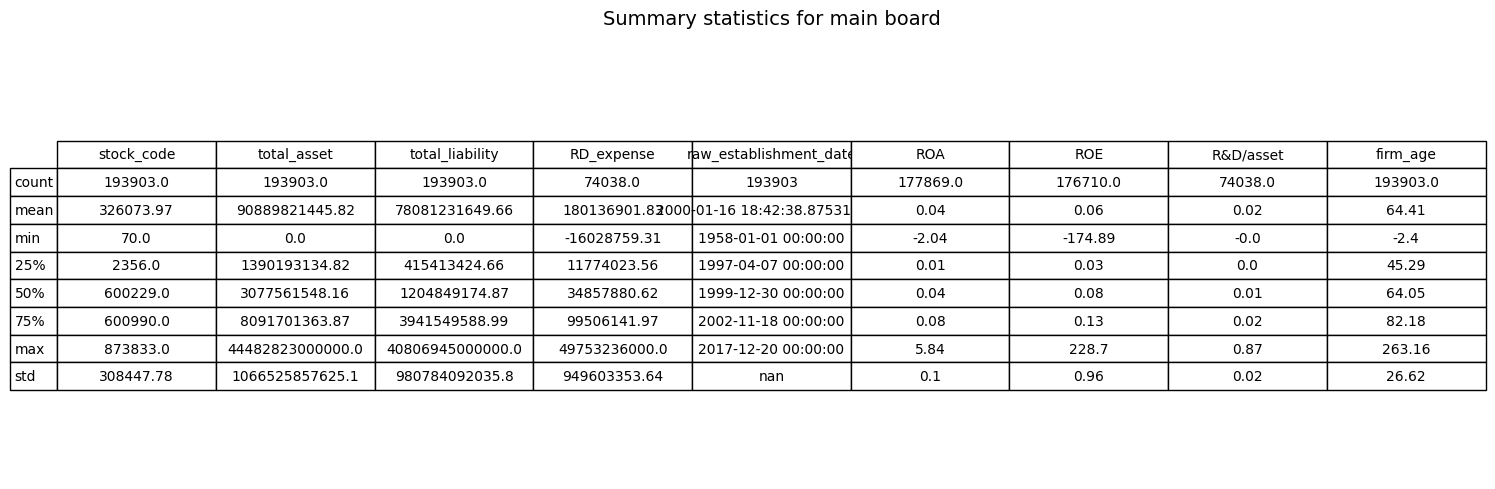

In [14]:
# Summary statistics for main board
figure, axis = plt.subplots(figsize=(15, 5)) 
axis.axis('off')  

# Plot the table
table = axis.table(
    cellText = summary_df_2_mainBoard.round(2).values,
    colLabels = summary_df_2_mainBoard.columns,
    rowLabels = summary_df_2_mainBoard.index,
    loc = 'center',
    cellLoc = 'center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5) 

plt.title("Summary statistics for main board", fontsize = 14, pad = 20)
plt.tight_layout()
plt.show()


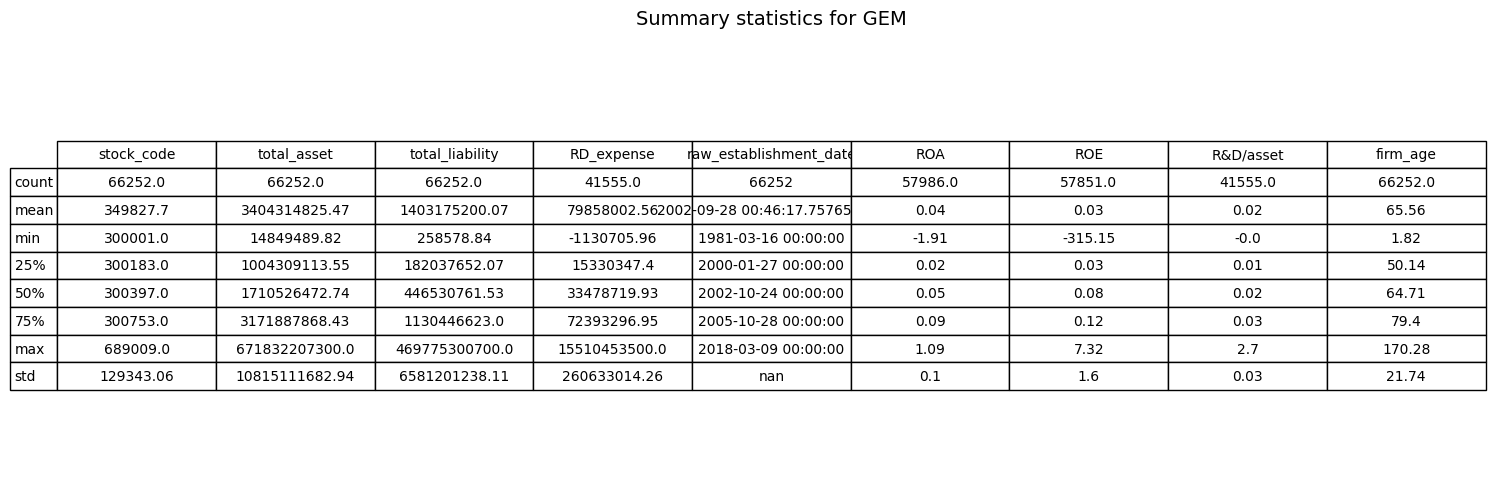

In [15]:
# Summary statistics for GEM
figure, axis = plt.subplots(figsize=(15, 5)) 
axis.axis('off')  

# Plot the table
table = axis.table(
    cellText = summary_df_2_GEM.round(2).values,
    colLabels = summary_df_2_GEM.columns,
    rowLabels = summary_df_2_GEM.index,
    loc = 'center',
    cellLoc = 'center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5) 

plt.title("Summary statistics for GEM", fontsize = 14, pad = 20)
plt.tight_layout()
plt.show()


### Problem 2

### Draw the graph

In [16]:
# Draw the time series of PE ratios. 

# Merge merged_df_1 and company_profile
merged_df_1 = pd.merge(merged_df_1, company_profile, on = ["stock_code"], how = "left")

# Convert "date" column to timestamp format.
merged_df_1["date"] = merged_df_1["date"].dt.to_timestamp()

# After merging, we have 2 market types here, namely "market_type_x" and "market_type_y".
merged_df_1["market_type"] = merged_df_1["market_type_x"]
merged_df_1.drop(columns = ["market_type_x", "market_type_y"], inplace = True)

# If market_type is 1, 4, 64, make them all main board
merged_df_1["market_type"] = merged_df_1["market_type"].replace([1, 4, 64], "Main Board")
merged_df_1["market_type"] = merged_df_1["market_type"].replace([16, 32], "GEM")
# isin(iterable): remember iterable, no boolean value. 
merged_df_1 = merged_df_1[merged_df_1["market_type"].isin(["Main Board", "GEM"])]

# By market_type, we group the DataFrame and calculate the time series of median PE ratio for each market type.
# This groups the DataFrame by both market_type and date, now each group represents a specific market type on a specific month
# .unstack(level = 0): This reshapes the grouped result, moves market_type from the row index to columns,
# and keeps date as the row index
PE_median = merged_df_1.groupby(["market_type", "date"])["PE_ratio"].median().unstack(level = 0)
# level = 0 → pivot by market_type
# level = 1 → pivot by date

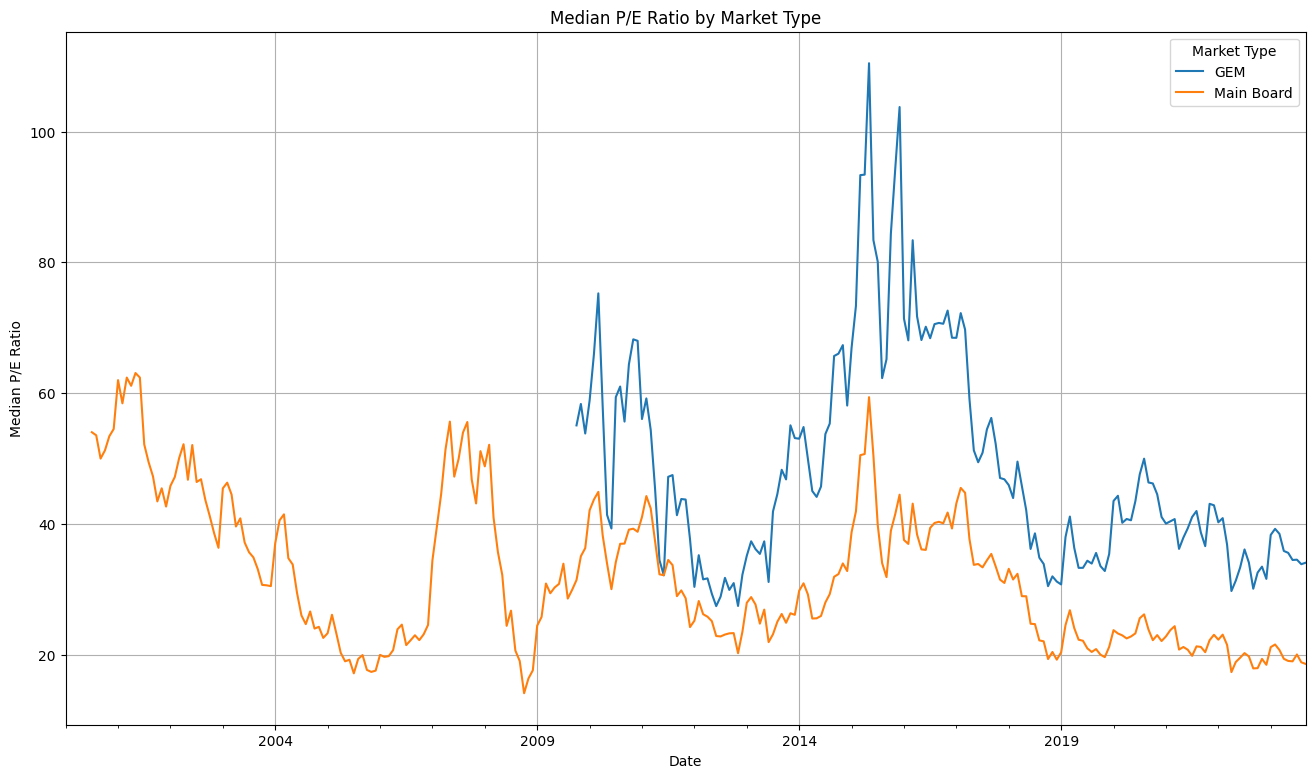

In [ ]:
# Plot
PE_median.plot(figsize = (16, 9))
plt.title("Median P/E Ratio by Market Type")
plt.xlabel("Date")
plt.ylabel("Median P/E Ratio")
plt.grid(True)
plt.legend(title = "Market Type")
plt.savefig(r"C:\Users\DELL\Desktop\Interview\Assignment_1\Output\PE_median_by_market_type.png", dpi = 300)
# plt.show()